## Feature Seelction using Correlation Ananlysis

In [103]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
#read the csv file
df=pd.read_csv("anaemia.csv")

In [105]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [106]:
df.dtypes

Number            int64
Sex              object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [107]:
#check if dataset has any null values
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

Since Anaemic column is of object data type so convert it in integer type so that correlation matrix can be formed

In [108]:
def foo(x):
    if x == 'No':
        return 0
    elif x == 'Yes':
        return 1
    else:
        return x
df['Anaemic']=df['Anaemic'].map(lambda x: foo(x))
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,1
1,2,F,45.6033,28.1900,26.2067,13.5,0
2,3,F,45.0107,28.9677,26.0215,11.7,0
3,4,F,44.5398,28.9899,26.4703,13.5,0
4,5,M,43.2870,30.6972,26.0158,12.4,0


In [109]:
df['Anaemic'].value_counts()

Anaemic
0    78
1    26
Name: count, dtype: int64

In dataset we see that Sex column usually has 2 values ('M' and 'F') but here due to some input error it is showing 4 different values in Sex column 

In [114]:
df.Sex = df['Sex'].str.replace('M ','M')
df.Sex = df['Sex'].str.replace('F ','F')

In [115]:
df.Sex.value_counts()

Sex
M    55
F    49
Name: count, dtype: int64

Sex can have some correlation with the target variable but it is a categorical column. So convert categorical column into numerical column by Dummy Encoding.

In [135]:
new_df1=pd.get_dummies(df)
new_df1.head()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_F,Sex_M
0,1,43.2555,30.8421,25.9025,6.3,1,False,True
1,2,45.6033,28.1900,26.2067,13.5,0,True,False
2,3,45.0107,28.9677,26.0215,11.7,0,True,False
3,4,44.5398,28.9899,26.4703,13.5,0,True,False
4,5,43.2870,30.6972,26.0158,12.4,0,False,True


### Using correlation analysis features are selected based on their correlation with each other or target variable
1. Based on correlation with each other: When two or more features are highly correlated with each other then it is better to remove all correlated featurs and have only 1 of them for futher processing
2. Based on correlation with target variable: When a feature is not correlated with target variable then it is better to remove it 

In [136]:
corr=new_df1.corr(numeric_only=False)
corr

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_F,Sex_M
Number,1.000000,0.286166,-0.077089,-0.345707,-0.019768,0.053997,-0.057428,0.057428
%Red Pixel,0.286166,1.000000,-0.732003,-0.845764,0.424586,-0.353376,-0.137778,0.137778
%Green pixel,-0.077089,-0.732003,1.000000,0.255589,-0.637340,0.566447,0.234813,-0.234813
%Blue pixel,-0.345707,-0.845764,0.255589,1.000000,-0.103373,0.057844,0.011616,-0.011616
Hb,-0.019768,0.424586,-0.637340,-0.103373,1.000000,-0.766506,-0.254932,0.254932
Anaemic,0.053997,-0.353376,0.566447,0.057844,-0.766506,1.000000,0.211307,-0.211307
Sex_F,-0.057428,-0.137778,0.234813,0.011616,-0.254932,0.211307,1.000000,-1.000000
Sex_M,0.057428,0.137778,-0.234813,-0.011616,0.254932,-0.211307,-1.000000,1.000000


Visual Representation of correlation matrix using heatmap

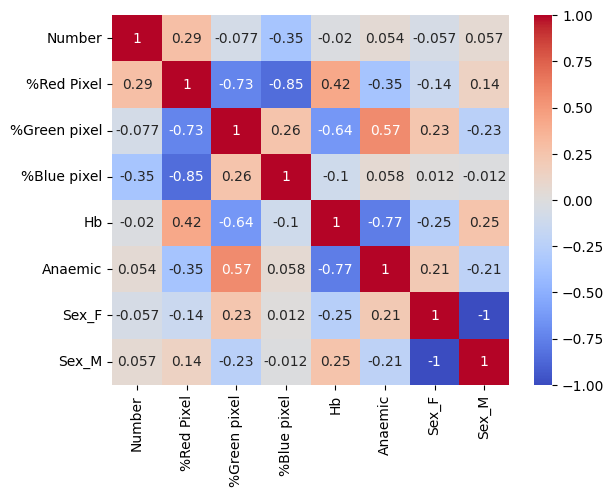

<Figure size 3000x2000 with 0 Axes>

In [137]:
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.figure(figsize=(30,20))
plt.show()

## Insights:
1. Number has -0.02 correlation with target variable i.e. Anaemic
2. Blue pixels and Red pixels have correlation of -0.85 hence one of these features can be removed
3. Green pixels and Hb are highly correlated with target variable
4. Sex_F and Sex_M are highly correlated so we can remove any one of them
   

In [138]:
new_df=new_df1.drop(labels=['%Blue pixel','Sex_M','Number'] , axis=1)

In [139]:
new_df.head()

,%Red Pixel,%Green pixel,Hb,Anaemic,Sex_F
0,43.2555,30.8421,6.3,1,False
1,45.6033,28.1900,13.5,0,True
2,45.0107,28.9677,11.7,0,True
3,44.5398,28.9899,13.5,0,True
4,43.2870,30.6972,12.4,0,False
